<a href="https://colab.research.google.com/github/Ezequiel-Maldonado87/DataScience-2024/blob/main/ProyectoDS_ParteIII_Maldonado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/saludfumadores.csv', sep =';')
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,165,80,80.1,0.8,0.5,1.0,1.0,156.0,...,105.0,99.0,17.1,1.0,1.0,25.0,37.0,30.0,3.0,N
1,Male,40,170,85,85.0,1.2,1.2,1.0,1.0,138.0,...,67.0,99.0,14.3,1.0,0.9,28.0,26.0,40.0,3.0,N
2,Male,55,160,65,88.0,1.2,1.5,1.0,1.0,100.0,...,168.0,99.0,16.5,1.0,1.0,26.0,34.0,65.0,3.0,N
3,Male,50,175,80,93.4,0.7,0.8,1.0,1.0,174.0,...,148.0,99.0,16.4,1.0,0.6,33.0,26.0,36.0,2.0,Y
4,Female,35,160,50,67.0,0.3,0.4,1.0,1.0,118.0,...,106.0,99.0,10.1,1.0,0.6,150.0,60.0,999.0,2.0,Y


**El dataset seleccionado contiene datos con diferentes valores clínicos de pacientes, donde algunos consumen tabaco. El objetivo del análisis es tratar de identificar, entender, si el consumo de esta sustancia esta relacionado con el incremento de masa y peso de estos individuos.**


Nomenclatura de los datos:

*   Sexo: Masculino - femenino
*   edad : edad
*   altura : altura del paciente
*   peso : peso del paciente
*   cintura : Cintura en Cm
*   vista_izquierda :Graduacion ojo izquierdo
*   vista_derecha : Graduacion ojo derecho
*   escucha_izquierda : audición izquierda, 1 (normal), 2 (anormal)
*   escucha_derecha : audición correcta, 1 (normal), 2 (anormal)
*   PAS : Presión arterial sistólica [mmHg]
*   PAD : Presión arterial diastólica [mmHg]
*   BLDS : BLDS o FSG (glucosa en sangre en ayunas) [mg/dL]
*   tot_chole : colesterol total[mg/dL]
*   HDL_cole : Colesterol HDL[mg/dL]
*   col_LDL :Colesterol LDL[mg/dL]
*   triglicéridos : triglicéridos [mg/dL]  
*   hemoglobina : hemoglobina[g/dL]
*   proteína_orina : proteína en orina, 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4)
*   suero de creatinina : creatinina sérica (sangre) [mg/dL]
*   SGOT_AST : SGOT(Glutamato-oxalacetato transaminasa) AST(Aspartato transaminasa)[UI/L]
*   ESGOT_ALT : ALT(Alanina transaminasa)[UI/L]
*   gamma_GTP : y-glutamil transpeptidasa[UI/L]
*   SMK_stat_type_cd : Estado de fumar, 1 (nunca), 2 (solía fumar pero lo dejó), 3 (fuma)





In [ ]:
#Renombrando las columnas
df = df.rename(columns={"sex": "Sexo", "age":"Edad", "height":"Altura", "weight":"Peso", "waistline":"Cintura","sight_left":"Vista_izq","sight_right":"Vista_der", "hear_left":"Audicion_izq","hear_right":"Audicion_der","tot_chole":"Colest_total", "HDL_chole":"Colest_HDL", "LDL_chole":"Colest_LDL","triglyceride":"Trigliceridos", "hemoglobin":"Hemoglobina", "urine_protein":"Proteina_orina", "serum_creatinine":"SuerodeCreatinina","SMK_stat_type_cd":"Estado de fumador", "DRK_YN":"Consumo de alcohol"})
df.head()

,Sexo,Edad,Altura,Peso,Cintura,Vista_izq,Vista_der,Audicion_izq,Audicion_der,SBP,...,Colest_LDL,Trigliceridos,Hemoglobina,Proteina_orina,SuerodeCreatinina,SGOT_AST,SGOT_ALT,gamma_GTP,Estado de fumador,Consumo de alcohol
0,Male,35,165,80,80.1,0.8,0.5,1.0,1.0,156.0,...,105.0,99.0,17.1,1.0,1.0,25.0,37.0,30.0,3.0,N
1,Male,40,170,85,85.0,1.2,1.2,1.0,1.0,138.0,...,67.0,99.0,14.3,1.0,0.9,28.0,26.0,40.0,3.0,N
2,Male,55,160,65,88.0,1.2,1.5,1.0,1.0,100.0,...,168.0,99.0,16.5,1.0,1.0,26.0,34.0,65.0,3.0,N
3,Male,50,175,80,93.4,0.7,0.8,1.0,1.0,174.0,...,148.0,99.0,16.4,1.0,0.6,33.0,26.0,36.0,2.0,Y
4,Female,35,160,50,67.0,0.3,0.4,1.0,1.0,118.0,...,106.0,99.0,10.1,1.0,0.6,150.0,60.0,999.0,2.0,Y


In [ ]:
#Obteniendo descripcion de los datos.
df.describe()

,Edad,Altura,Peso,Cintura,Vista_izq,Vista_der,Audicion_izq,Audicion_der,SBP,DBP,...,Colest_HDL,Colest_LDL,Trigliceridos,Hemoglobina,Proteina_orina,SuerodeCreatinina,SGOT_AST,SGOT_ALT,gamma_GTP,Estado de fumador
count,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,...,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000
mean,47.590782,162.248091,63.269291,81.177603,0.981844,0.981060,1.031425,1.030500,122.386317,76.037713,...,57.044876,113.048413,132.146352,14.225607,1.095114,0.859802,25.931262,25.723922,36.932137,1.610045
std,14.179667,9.276408,12.532689,9.611837,0.612793,0.615506,0.174466,0.171961,14.505570,9.932545,...,32.213519,38.639356,100.007589,1.579527,0.436114,0.445456,18.614030,24.531428,48.965710,0.818828
min,20.000000,130.000000,30.000000,35.000000,0.100000,0.100000,1.000000,1.000000,75.000000,42.000000,...,3.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,2.000000,1.000000
25%,35.000000,155.000000,55.000000,74.000000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,74.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.200000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,30.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,129.000000,9.900000,9.900000,2.000000,2.000000,230.000000,160.000000,...,8110.000000,5119.000000,2522.000000,20.900000,6.000000,81.000000,1911.000000,2309.000000,999.000000,3.000000


**GRAFICO 1 - Observemos que cantidad de pacientes de la muestra consumen Tabaco**
*Nomenclatura: 1 (nunca), 2 (solía fumar pero lo dejó), 3 (fuma)*

<Axes: xlabel='Estado de fumador', ylabel='count'>

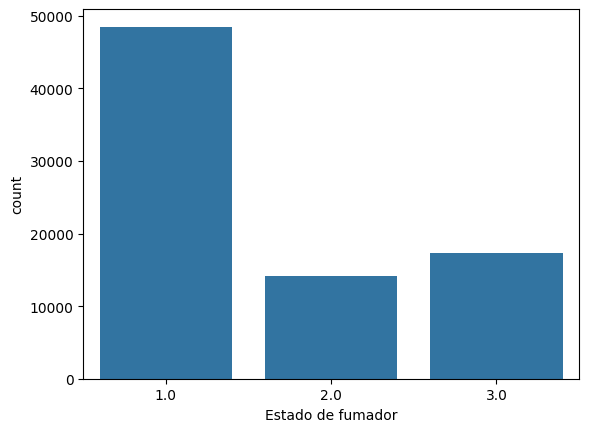

In [ ]:
plt.figure()
sns.countplot(data = df,
              x = 'Estado de fumador')

Los pacientes de la muestra que consumen tabaco representan el 21,2% de la base.


**GRAFICO 2 - En el siguiente grafico observamos como se distribuye el peso de los pacientes en la muestra.**

<Axes: xlabel='Peso', ylabel='Count'>

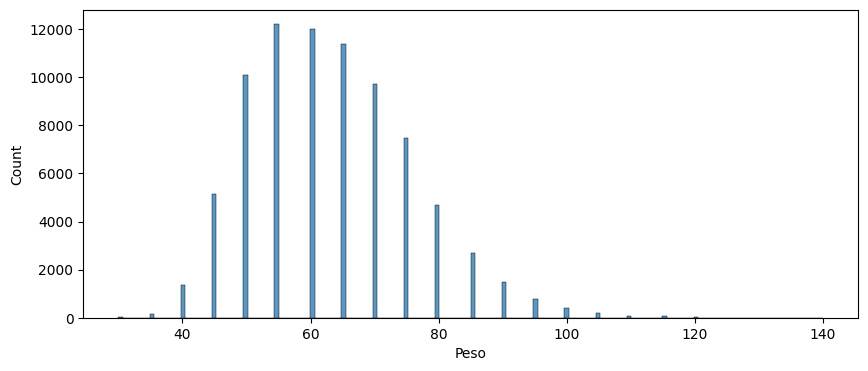

In [ ]:
plt.figure(figsize = (10,4
                    ))
sns.histplot(data = df,
                x = 'Peso')

**GRAFICO 3 y 4 - ¿Existe relacion entre el consumo de tabaco con el peso y centrimetros de cintura?**

<Axes: xlabel='Peso', ylabel='Cintura'>

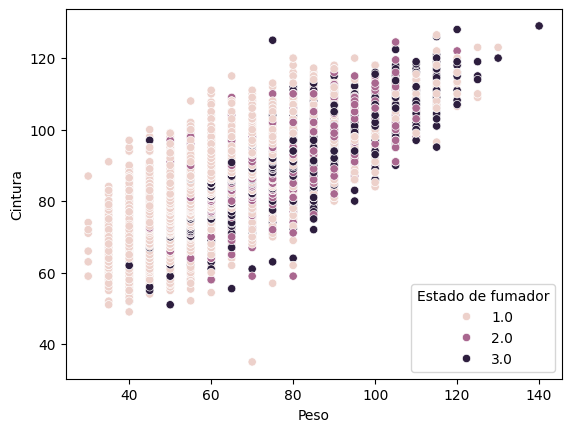

In [ ]:
sns.scatterplot(x="Peso", y="Cintura",hue="Estado de fumador", data=df)

<Axes: xlabel='Peso', ylabel='Cintura'>

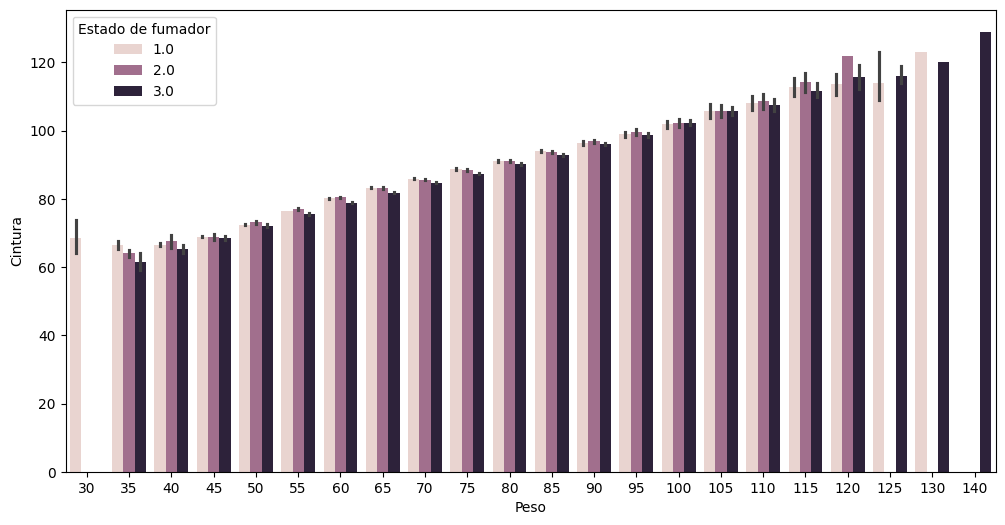

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.barplot(y='Cintura',x='Peso',hue='Estado de fumador',data=df)

**GRAFICO 4 -¿Cual es la media del peso de los pacientes segun el sexo?**

<Axes: xlabel='Sexo', ylabel='Peso'>

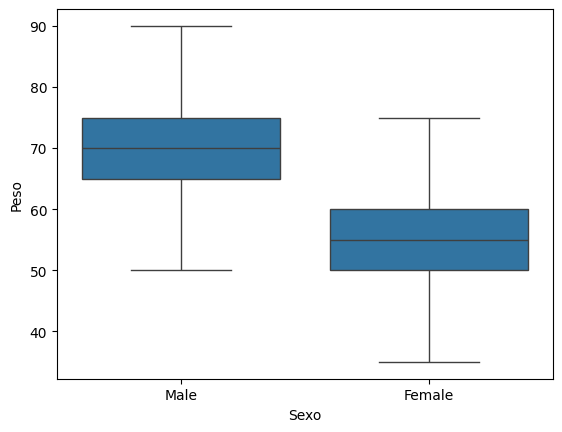

In [ ]:
plt.figure()
sns.boxplot(data = df,
            x = 'Sexo',
            y = 'Peso',
            showfliers = False)

**El promedio de peso es de 55 kg en el sexo femenino, 70 kg en el sexo masculino.**



**PASO 5 - BUSCANDO VALORES PERDIDOS**

In [ ]:
nun_missing = (df[['Colest_HDL','Colest_LDL','Trigliceridos','Hemoglobina']] == 0).sum()
print(nun_missing)

Colest_HDL       0
Colest_LDL       0
Trigliceridos    0
Hemoglobina      0
dtype: int64


**No se registran valores perdidos en el Dataset.**

Pareciera que el incremento de peso y los cm de cintura tienen relacion, tanto con los pacientes que consumen tabaco, como los que no, o abandonaron el habito. Utilicemos el modelo  k-NN para verificar si nos ofrece nuevas conclusiones  

In [ ]:
X = df[['Peso', 'Cintura']]
y = df['Estado de fumador'] #.replace({'1.0': 0, '2.0':1, '3.0':2})

In [ ]:
# Importar las librerias del modelo
from sklearn.neighbors import KNeighborsClassifier
#Crear la instancia del modelo
clf = KNeighborsClassifier (n_neighbors=10)

# Convertir y a enteros
y = y.astype(np.int_)

# Entrenar el modelo con los datos y la etiqueta clf.fit(x, y)
clf.fit(X,y)


KNeighborsClassifier(n_neighbors=10)

In [ ]:
X2 = X.values
y2 = y.values

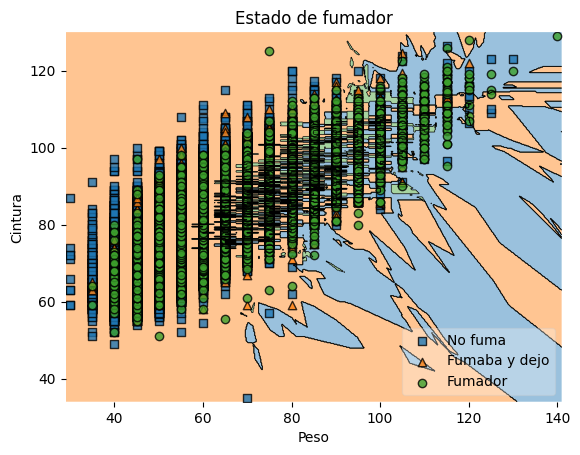

In [ ]:
ax=plot_decision_regions (X2, y2, clf=clf)
plt.xlabel('Peso')
plt.ylabel('Cintura')
plt.title('Estado de fumador')
handles, labels = ax.get_legend_handles_labels()
ax.legend (handles,['No fuma','Fumaba y dejo','Fumador'], framealpha=0.3, scatterpoints=1)
plt.show()

#Nomenclatura: 1 (nunca), 2 (solía fumar pero lo dejó), 3 (fuma)

**CONCLUSIONES**

La distribución de los datos muestra cómo se agrupan los individuos en función de su peso y cintura. Hay un patrón observable en la distribución, donde los puntos están dispersos a lo largo de los ejes de peso y cintura.
Observando el solapamiento de los puntos de diferentes clases en ciertas áreas, podemos concluir que hay una alta intersección entre las clases "Fumaba y dejó" y "Fumador" en ciertas regiones del espacio de peso y cintura.
Esto sugiere que, en estas áreas, es más difícil para el modelo diferenciar entre estas dos categorías.
El análisis muestra que el modelo k-NN es capaz de identificar patrones en los datos, pero también resalta áreas donde la clasificación es más desafiante debido al solapamiento de las características entre las diferentes categorías de fumadores.
Podemos concluir en que el modelo seleccionado no es del todo eficiente.